# NB03: Data Visualisation

In [1]:
# Importing all the necessary libraries
from dotenv import load_dotenv
from functions import *
from bs4 import BeautifulSoup
from pprint import pprint
from auth import *
import pandas as pd
import sqlite3
from sqlalchemy import create_engine
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
#! pip install nltk
from nltk.corpus import stopwords
import seaborn as sns
#! pip install wordcloud
from os import path
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import colormaps as cm
from scipy.interpolate import splprep, splev 
from IPython.display import Image, display
from collections import Counter
import re

In [2]:
# Path to your SQLite database
db_path = '../data/spotify.db'

# Connect to the database
conn = sqlite3.connect(db_path)

# Query for male artists (gender = 0)
male_artists_df = pd.read_sql_query(
    "SELECT * FROM top_tracks WHERE gender = 0;", conn
)

# Query for female artists (gender = 1)
female_artists_df = pd.read_sql_query(
    "SELECT * FROM top_tracks WHERE gender = 1;", conn
)

# Close the database connection
conn.close()

# Display the results
print("Male Artists DataFrame:")
print(male_artists_df.head())

print("\nFemale Artists DataFrame:")
print(female_artists_df.head())


Male Artists DataFrame:
                  Track Name        Artists Gender  \
0  stay (with justin bieber)  justin bieber      0   
1                      ghost  justin bieber      0   
2              love yourself  justin bieber      0   
3                      sorry  justin bieber      0   
4          beauty and a beat  justin bieber      0   

                                              Lyrics  
0   contributorsi do the same thing i told you th...  
1   lyricsverse \nyoungblood thinks there's alway...  
2   lyricsverse \nfor all the times that you rain...  
3   lyricswritten by julia michaels justin trante...  
4   lyricsintro nicki minaj\nyeah\nyoung money\nn...  

Female Artists DataFrame:
                 Track Name  Artists Gender  \
0             we found love  rihanna      1   
1  only girl (in the world)  rihanna      1   
2         love on the brain  rihanna      1   
3                  umbrella  rihanna      1   
4                      stay  rihanna      1   

           

In [3]:
# Fetch lyrics for male artists
db_path = '../data/spotify.db'

# Connect to the database
conn = sqlite3.connect(db_path)

male_artists_query = "SELECT Lyrics FROM top_tracks WHERE Gender = 0;"
male_lyrics = conn.execute(male_artists_query).fetchall()
male_lyrics_text = " ".join([row[0] for row in male_lyrics if row[0]])

# Fetch lyrics for female artists
female_artists_query = "SELECT Lyrics FROM top_tracks WHERE Gender = 1;"
female_lyrics = conn.execute(female_artists_query).fetchall()
female_lyrics_text = " ".join([row[0] for row in female_lyrics if row[0]])

# Get word frequencies
male_word_freq = get_most_frequent_words(male_lyrics_text)
female_word_freq = get_most_frequent_words(female_lyrics_text)

# Sort frequencies in descending order
male_word_freq = sorted(male_word_freq.items(), key=lambda x: x[1], reverse=True)
female_word_freq = sorted(female_word_freq.items(), key=lambda x: x[1], reverse=True)

# Print results
print("Most frequent words for male artists:", male_word_freq[:10])
print("Most frequent words for female artists:", female_word_freq[:10])


Most frequent words for male artists: [('i', 1127), ('you', 886), ('the', 744), ('on', 579), ('to', 520), ('and', 401), ('come', 395), ('my', 376), ('it', 373), ('we', 341)]
Most frequent words for female artists: [('i', 1060), ('you', 845), ('the', 735), ('me', 490), ('a', 454), ('it', 436), ('t', 343), ('and', 326), ('my', 311), ('to', 284)]


In [4]:
conn = sqlite3.connect('../data/spotify.db')

# Fetch lyrics for male and female artists
male_artists_query = "SELECT Lyrics FROM top_tracks WHERE Gender = 0;"
female_artists_query = "SELECT Lyrics FROM top_tracks WHERE Gender = 1;"

# Execute queries and fetch results
male_lyrics = conn.execute(male_artists_query).fetchall()
female_lyrics = conn.execute(female_artists_query).fetchall()

# Close the database connection
conn.close()

# Extract lyrics as lists of strings
male_lyrics_list = [row[0] for row in male_lyrics if row[0]]  # Avoid None or empty strings
female_lyrics_list = [row[0] for row in female_lyrics if row[0]]

# Get the most frequent words for male and female artists
male_word_freq = get_most_frequent_words_final(male_lyrics_list)
female_word_freq = get_most_frequent_words_final(female_lyrics_list)

# Sort the word frequencies in descending order
male_word_freq = sorted(male_word_freq.items(), key=lambda x: x[1], reverse=True)
female_word_freq = sorted(female_word_freq.items(), key=lambda x: x[1], reverse=True)

# Print the most frequent words
print("Most frequent words for male artists:", male_word_freq)
print("Most frequent words for female artists:", female_word_freq)

Most frequent words for male artists: [('come', np.int64(395)), ('night', np.int64(236)), ('baby', np.int64(200)), ('know', np.int64(159)), ('love', np.int64(145)), ('lucky', np.int64(115)), ('cash', np.int64(89)), ('let', np.int64(76)), ('good', np.int64(69)), ('say', np.int64(69)), ('dance', np.int64(68)), ('right', np.int64(63)), ('girl', np.int64(59)), ('time', np.int64(58)), ('lose', np.int64(57)), ('want', np.int64(50)), ('make', np.int64(49)), ('outchea', np.int64(47)), ('way', np.int64(46)), ('life', np.int64(45))]
Most frequent words for female artists: [('love', np.int64(167)), ('baby', np.int64(162)), ('know', np.int64(150)), ('come', np.int64(96)), ('bass', np.int64(90)), ('gimme', np.int64(85)), ('let', np.int64(82)), ('want', np.int64(72)), ('boy', np.int64(67)), ('lil', np.int64(67)), ('tell', np.int64(66)), ('time', np.int64(59)), ('make', np.int64(52)), ('way', np.int64(52)), ('bad', np.int64(51)), ('music', np.int64(51)), ('young', np.int64(50)), ('feel', np.int64(47)

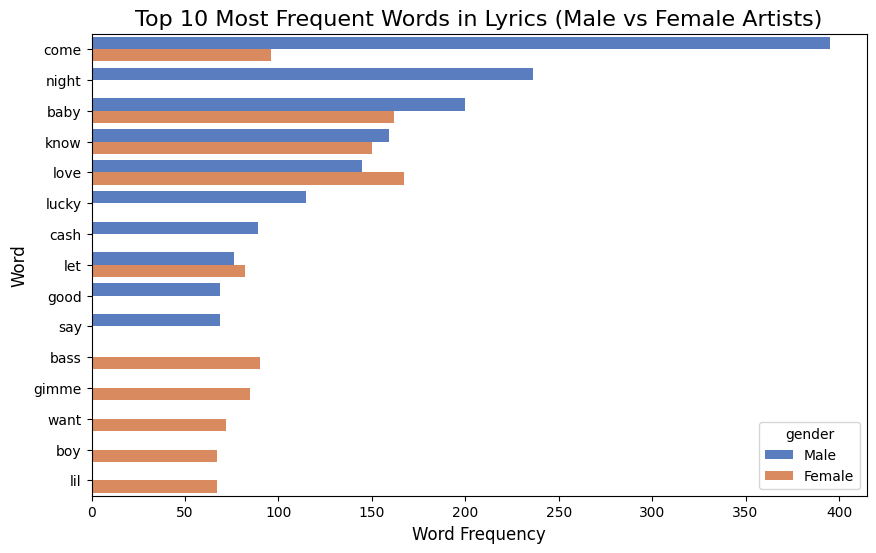

In [ ]:
# Call the function with the top frequent words for male and female artists
plot_word_frequencies(male_word_freq, female_word_freq, top_n=10)

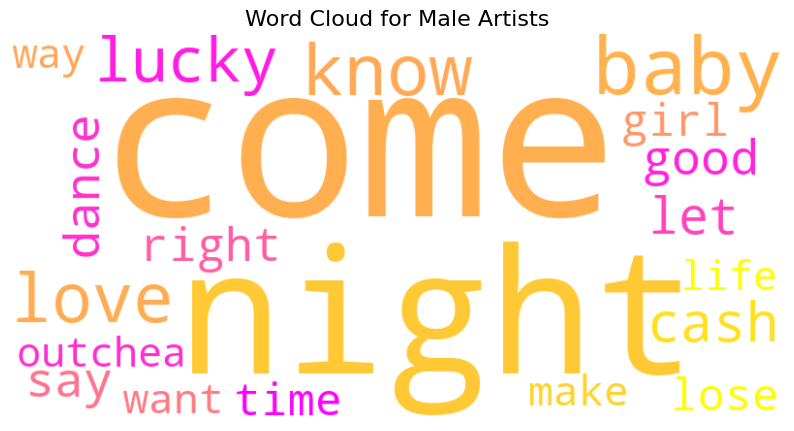

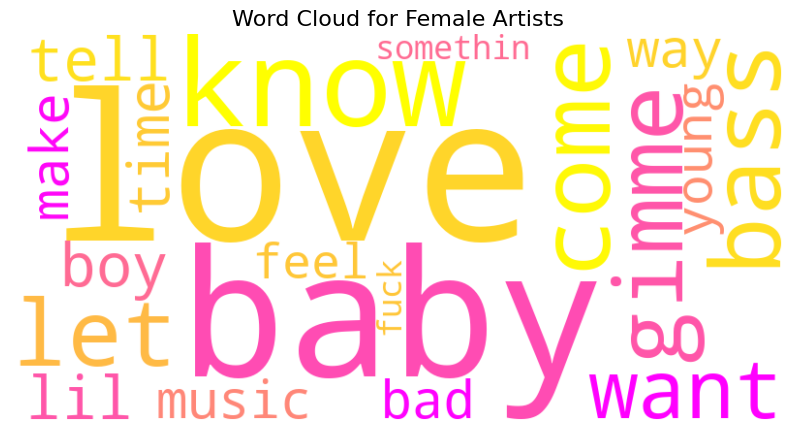

In [6]:
# Plotting the word clouds for male and female artists
plot_word_cloud(male_word_freq, title="Word Cloud for Male Artists", save_path="../images/male_wordcloud1.png")
plot_word_cloud(female_word_freq, title="Word Cloud for Female Artists", save_path="../images/female_wordcloud1.png")

In [7]:
db_path = '../data/spotify.db'
conn = sqlite3.connect(db_path)


query = "SELECT Lyrics, gender FROM top_tracks WHERE Lyrics IS NOT NULL"
df = pd.read_sql_query(query, conn)


conn.close()

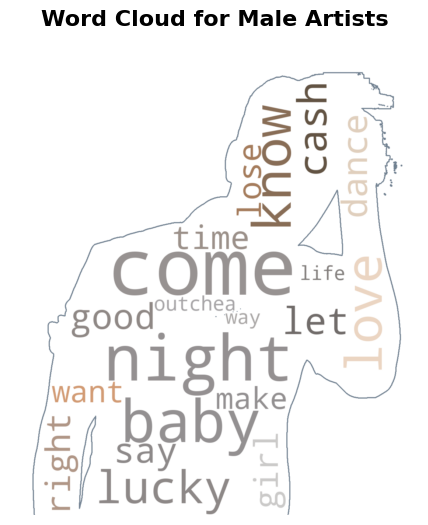

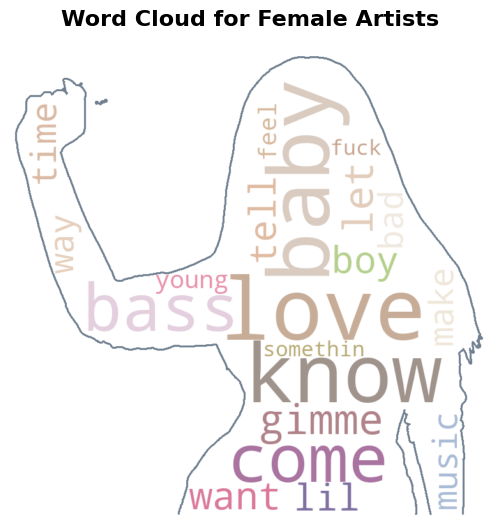

In [8]:
# Calling silhouette masks to fit the word clouds into
male_mask_path = "../images/justin.png" 
female_mask_path = "../images/nicki.png"  

# Using the plot_shaped_word_cloud function to plot male and female word clouds, based on singer silhouette masks
# Colours are also picked from the original images
plot_shaped_word_cloud(male_word_freq, mask_path=male_mask_path, title="Word Cloud for Male Artists", max_words=500)
plot_shaped_word_cloud(female_word_freq, mask_path=female_mask_path, title="Word Cloud for Female Artists", max_words=500)

Click [here](https://github.com/lse-ds105/w10-summative-deyavuz/tree/main?tab=readme-ov-file#table-of-contents) to navigate back to the Table of Contents!